# 1. Introduction

## 1.1 Purpose

This project aims to conduct an in-depth analysis of Tyler, the Creator's discography by exploring various audio and track-level features obtained from the Spotify API. The goal is to uncover meaningful patterns and insights about Tyler, the Creator's music, including trends in audio characteristics across albums, popularity dynamics, and collaborative aspects. The analysis serves both to highlight Tyler’s creative evolution and to showcase methods of musical data analysis.

## 1.2 Data Overview

The data comprises a rich set of features for each track in Tyler, the Creator's discography, covering a range of audio, temporal, and metadata characteristics. The columns include:

- **Basic Information**: Track, album, and artist names, album art, release date, and genres.
- **Popularity & Explicit Content**: Track popularity scores on Spotify, and flags for explicit content.
- **Audio Features**: Key musical attributes such as danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.
- **Additional Metadata**: Duration (in ms and seconds), release details (year, month, day of the week), and the presence of featured artists.

This dataset provides a comprehensive basis for analyzing musical structure, emotional tone, and artistic collaborations.

| Column                  | Description                                                                                               |
|-------------------------|-----------------------------------------------------------------------------------------------------------|
| **artist_name**         | The name of the main artist for the track, in this case, always "Tyler, the Creator."                    |
| **artist_image_url**    | URL link to an image of the artist, usually provided by Spotify.                                         |
| **track_name**          | The title of the track as listed on Spotify.                                                             |
| **track_id**            | Spotify's unique identifier for the track.                                                               |
| **album_name**          | The name of the album on which the track appears.                                                        |
| **album_id**            | Spotify's unique identifier for the album.                                                               |
| **album_artwork_url**   | URL link to the album cover art image.                                                                   |
| **genres**              | List of musical genres associated with the artist.                                                       |
| **release_date**        | The date the track or album was released, usually in YYYY-MM-DD format.                                  |
| **popularity**          | A score between 0 and 100 representing the track's popularity, where higher values indicate higher popularity. |
| **explicit**            | Boolean indicator of whether the track contains explicit content (True = explicit, False = not explicit).|
| **danceability**        | A measure from 0.0 to 1.0 representing how suitable a track is for dancing, based on tempo, rhythm, and beat strength. |
| **energy**              | A measure from 0.0 to 1.0 indicating the intensity and activity of a track; higher values mean higher energy. |
| **key**                 | The key of the track represented as an integer (0 = C, 1 = C♯/D♭, ..., 11 = B).                         |
| **loudness**            | The overall loudness of the track in decibels (dB), averaged across the entire track; values typically range between -60 and 0 dB. |
| **mode**                | Indicates the modality of the track, where 1 = major and 0 = minor.                                      |
| **speechiness**         | A measure from 0.0 to 1.0 that estimates the presence of spoken words in the track.                      |
| **acousticness**        | A measure from 0.0 to 1.0 indicating the likelihood the track is acoustic.                               |
| **instrumentalness**    | A measure from 0.0 to 1.0 representing the probability that the track contains no vocals.                |
| **liveness**            | A measure from 0.0 to 1.0 indicating the likelihood that the track was performed live.                   |
| **valence**             | A measure from 0.0 to 1.0 describing the musical positiveness of the track; higher values indicate more positive sounds (e.g., happy, cheerful). |
| **tempo**               | The track's tempo in beats per minute (BPM).                                                             |
| **time_signature**      | An estimated overall time signature of a track (e.g., 4 = 4/4 time, 3 = 3/4 time).                       |
| **featured_artists**    | List of other artists featured on the track, if any.                                                     |
| **type**                | The type of Spotify object; in this dataset, it is always "track."                                       |
| **duration_ms**         | Duration of the track in milliseconds.                                                                   |
| **year**                | The year the track was released, extracted from the release date.                                        |
| **month**               | The month the track was released, extracted from the release date.                                       |
| **day_of_the_week**     | The day of the week the track was released, extracted from the release date.                             |


# 2. Libraries and Setup

## 2.1 Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import IPython
from IPython.display import display, HTML

warnings.filterwarnings('ignore')
pd.reset_option('display.max_columns')

# 3. Data Acquisition 

## 3.1 Data Source

The data was obtained directly from the **Spotify API**. Spotify's API provides a variety of track-level and artist-level features, including in-depth audio analysis for each track. For this project, data on Tyler, the Creator's tracks, albums, and audio features were extracted and then processed for analysis.

## 3.2 Loading Data

In [46]:
data = pd.read_csv("TylertheCreator_forAnalysis.csv")
df = pd.DataFrame(data)

In [47]:
display(df.head())
display(df.tail())
display(df.sample(5))

artist_name                                   artist_image_url  \
0  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
1  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
2  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
3  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
4  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   

                           track_name                track_id   album_name  \
0    St. Chroma (feat. Daniel Caesar)  1QoyuMHNBe7lg3YW4Qtll4  CHROMAKOPIA   
1                         Rah Tah Tah  5RePVWy39tLpHH0WwXgBsK  CHROMAKOPIA   
2                                Noid  1YdtGoSYDvVQKoUqSDXX41  CHROMAKOPIA   
3  Darling, I (feat. Teezo Touchdown)  0VaeksJaXy5R1nvcTMh3Xk  CHROMAKOPIA   
4                            Hey Jane  3Umj02ZNl4d356pS1D38mn  CHROMAKOPIA   

                 album_id                                  album_artwork_url  \
0  0U28P0QVB1QRxpqp5IHOlH  https://i.scdn.co/image/ab67616d0000b273232374...   
1  0U28P0QVB1QRxpqp5IHOlH  https://i.scdn.co/image/ab67616d0000b273232374...   
2  0U28P0QVB1QRxpqp5IHOlH  https://i.scdn.co/image/ab67616d0000b273232374...   
3  0U28P0QVB1QRxpqp5IHOlH  https://i.scdn.co/image/ab67616d0000b273232374...   
4  0U28P0QVB1QRxpqp5IHOlH  https://i.scdn.co/image/ab67616d0000b273232374...   

               genres release_date  popularity  ...  liveness  valence  \
0  ['hip hop', 'rap']   2024-10-28          87  ...     0.368    0.373   
1  ['hip hop', 'rap']   2024-10-28          85  ...     0.381    0.514   
2  ['hip hop', 'rap']   2024-10-28          84  ...     0.494    0.418   
3  ['hip hop', 'rap']   2024-10-28          85  ...     0.434    0.361   
4  ['hip hop', 'rap']   2024-10-28          83  ...     0.621    0.669   

     tempo  time_signature                           featured_artists   type  \
0  150.450               4    ['Tyler, The Creator', 'Daniel Caesar']  track   
1   82.557               4                     ['Tyler, The Creator']  track   
2   82.318               4                     ['Tyler, The Creator']  track   
3   97.571               4  ['Tyler, The Creator', 'Teezo Touchdown']  track   
4   94.563               4                     ['Tyler, The Creator']  track   

   duration  year  month  day_of_the_week  
0    197019  2024     10           Monday  
1    165412  2024     10           Monday  
2    284363  2024     10           Monday  
3    253834  2024     10           Monday  
4    240742  2024     10           Monday  

[5 rows x 29 columns]

artist_name                                   artist_image_url  \
188  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
189  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
190  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
191  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
192  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   

      track_name                track_id album_name                album_id  \
188         AU79  7nfjw4GlYu6kGVkf19yzFe     Goblin  5dbCm8qaCdWnNdVyi3urUO   
189       Golden  0150LSsZrpksYFj3nbynwj     Goblin  5dbCm8qaCdWnNdVyi3urUO   
190       Burger  5zjMSaWC8t8XEedXBAiFUr     Goblin  5dbCm8qaCdWnNdVyi3urUO   
191  Untitled 63  5QVzpGhv1GGMeKOUvtzO0A     Goblin  5dbCm8qaCdWnNdVyi3urUO   
192  Steak Sauce  2WBHjwYSh04TLOwxgtny1O     Goblin  5dbCm8qaCdWnNdVyi3urUO   

                                     album_artwork_url              genres  \
188  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
189  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
190  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
191  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
192  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   

    release_date  popularity  ...  liveness  valence    tempo  time_signature  \
188   2011-05-09          41  ...    0.1330    0.520  159.965               4   
189   2011-05-09          43  ...    0.2430    0.438  133.576               4   
190   2011-05-09          43  ...    0.1320    0.324   73.011               4   
191   2011-05-09          42  ...    0.0928    0.142   78.000               4   
192   2011-05-09          41  ...    0.2720    0.280   95.898               4   

                    featured_artists   type  duration  year  month  \
188           ['Tyler, The Creator']  track    220253  2011      5   
189           ['Tyler, The Creator']  track    343280  2011      5   
190  ['Tyler, The Creator', 'Hodgy']  track    229640  2011      5   
191           ['Tyler, The Creator']  track     66933  2011      5   
192           ['Tyler, The Creator']  track    202106  2011      5   

     day_of_the_week  
188           Monday  
189           Monday  
190           Monday  
191           Monday  
192           Monday  

[5 rows x 29 columns]

artist_name                                   artist_image_url  \
179  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
67   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
175  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
92   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
137  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   

                                            track_name  \
179                                       Transylvania   
67        Where This Flower Blooms (feat. Frank Ocean)   
175                                             Goblin   
92   OKAGA, CA (feat. Alice Smith, Leon Ware & Clem...   
137                                WOLF - Instrumental   

                   track_id                   album_name  \
179  49OZTN2N6XxCectfbA9Gf9                       Goblin   
67   6KuXb26rHuRy3ZDse1VRmx                   Flower Boy   
175  5LJD1sBRPnDkhWs2D5qRk2                       Goblin   
92   3QZY1nrt8MKrlnotFwRwcm  Cherry Bomb + Instrumentals   
137  22LjwEKshG0rIXnbwAefGQ         Wolf + Instrumentals   

                   album_id  \
179  5dbCm8qaCdWnNdVyi3urUO   
67   2nkto6YNI4rUYTLqEwWJ3o   
175  5dbCm8qaCdWnNdVyi3urUO   
92   5V3Chnpno9oTI7JSPXKUf3   
137  4jEKedq9rWPV9OXuMkrZCa   

                                     album_artwork_url              genres  \
179  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
67   https://i.scdn.co/image/ab67616d0000b2738940ac...  ['hip hop', 'rap']   
175  https://i.scdn.co/image/ab67616d0000b27328ae9a...  ['hip hop', 'rap']   
92   https://i.scdn.co/image/ab67616d0000b27337906e...  ['hip hop', 'rap']   
137  https://i.scdn.co/image/ab67616d0000b273ecdf37...  ['hip hop', 'rap']   

    release_date  popularity  ...  liveness  valence    tempo  time_signature  \
179   2011-05-09          47  ...    0.2010    0.197  122.448               4   
67    2017-07-21          71  ...    0.1660    0.270  130.090               4   
175   2011-05-09          50  ...    0.2190    0.444   78.235               4   
92    2015-04-13          41  ...    0.0782    0.205  145.940               4   
137   2013-04-01          33  ...    0.0722    0.154  139.672               3   

                                      featured_artists   type  duration  year  \
179                             ['Tyler, The Creator']  track    192200  2011   
67               ['Tyler, The Creator', 'Frank Ocean']  track    194933  2017   
175                             ['Tyler, The Creator']  track    408520  2011   
92   ['Tyler, The Creator', 'Alice Smith', 'Leon Wa...  track    397384  2015   
137                             ['Tyler, The Creator']  track    108826  2013   

     month  day_of_the_week  
179      5           Monday  
67       7           Friday  
175      5           Monday  
92       4           Monday  
137      4           Monday  

[5 rows x 29 columns]

# 4. Data Cleaning and Preprocessing

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        193 non-null    object 
 1   artist_image_url   193 non-null    object 
 2   track_name         193 non-null    object 
 3   track_id           193 non-null    object 
 4   album_name         193 non-null    object 
 5   album_id           193 non-null    object 
 6   album_artwork_url  193 non-null    object 
 7   genres             193 non-null    object 
 8   release_date       193 non-null    object 
 9   popularity         193 non-null    int64  
 10  explicit           193 non-null    bool   
 11  danceability       193 non-null    float64
 12  energy             193 non-null    float64
 13  key                193 non-null    int64  
 14  loudness           193 non-null    float64
 15  mode               193 non-null    int64  
 16  speechiness        193 non

## 4.1 Handle Missing Data

In [51]:
N1 = df.shape[0]
dfna=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Null_Count'})
dfna['Nullcnt_pct']=(dfna.Null_Count/N1)*100
dfna['NonNullcnt']=N1-dfna.Null_Count
dfna['NonNullcnt_pct']=(1-(dfna.Null_Count/N1))*100
dfna

Null_Count  Nullcnt_pct  NonNullcnt  NonNullcnt_pct
artist_name                 0          0.0         193           100.0
artist_image_url            0          0.0         193           100.0
track_name                  0          0.0         193           100.0
track_id                    0          0.0         193           100.0
album_name                  0          0.0         193           100.0
album_id                    0          0.0         193           100.0
album_artwork_url           0          0.0         193           100.0
genres                      0          0.0         193           100.0
release_date                0          0.0         193           100.0
popularity                  0          0.0         193           100.0
explicit                    0          0.0         193           100.0
danceability                0          0.0         193           100.0
energy                      0          0.0         193           100.0
key                         0          0.0         193           100.0
loudness                    0          0.0         193           100.0
mode                        0          0.0         193           100.0
speechiness                 0          0.0         193           100.0
acousticness                0          0.0         193           100.0
instrumentalness            0          0.0         193           100.0
liveness                    0          0.0         193           100.0
valence                     0          0.0         193           100.0
tempo                       0          0.0         193           100.0
time_signature              0          0.0         193           100.0
featured_artists            0          0.0         193           100.0
type                        0          0.0         193           100.0
duration                    0          0.0         193           100.0
year                        0          0.0         193           100.0
month                       0          0.0         193           100.0
day_of_the_week             0          0.0         193           100.0

## 4.2 Data Type Adjustments

In [53]:
df['album_name'] = df['album_name'].astype('category')
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')

In [54]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day_of_the_week'] = df['release_date'].dt.day_name()

## 4.3 Check for Duplicates

In [56]:
df.duplicated(subset=['track_id']).sum()

0

In [57]:
df[df['track_name'].duplicated(keep=False)].sort_values(by='track_name')

artist_name                                   artist_image_url  \
87   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
113  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
126  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
164  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
162  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
..                  ...                                                ...   
28   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
157  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
119  Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
41   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
17   Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   

                                            track_name  \
87   2SEATER (feat. Aaron Shaw, Samantha Nelson & A...   
113  2SEATER (feat. Aaron Shaw, Samantha Nelson & A...   
126                                                 48   
164                                                 48   
162                                             Answer   
..                                                 ...   
28                                            WILSHIRE   
157                                               WOLF   
119                                               WOLF   
41   WUSYANAME (feat. Youngboy Never Broke Again & ...   
17   WUSYANAME (feat. Youngboy Never Broke Again & ...   

                   track_id                                album_name  \
87   5LUJ8X9S6lJOeUwJkWqCeX               Cherry Bomb + Instrumentals   
113  6Xw3iWrQKgArwlRhVuU9CK                               Cherry Bomb   
126  3e1eAGw2Icto28DqCqtNSG                      Wolf + Instrumentals   
164  2wK7y55bzry7tUDmDqYaz7                                      Wolf   
162  6rqj2zeKhLy3exkuFi6mSz                                      Wolf   
..                      ...                                       ...   
28   2z27xc2eCnIZOBtBHuLQEQ  CALL ME IF YOU GET LOST: The Estate Sale   
157  2JZpS2sOdJy37oBpn1GuPW                                      Wolf   
119  0fqkchNanlXCoNacucPP17                      Wolf + Instrumentals   
41   5B0kgjHULYJhAQkK5XsMoC                   CALL ME IF YOU GET LOST   
17   1G3YgeTpECl3LYqFsUfzs5  CALL ME IF YOU GET LOST: The Estate Sale   

                   album_id  \
87   5V3Chnpno9oTI7JSPXKUf3   
113  621OhgnZJ7Pz8iUazct1In   
126  4jEKedq9rWPV9OXuMkrZCa   
164  40QTqOBBxCEIQlLNdSjFQB   
162  40QTqOBBxCEIQlLNdSjFQB   
..                      ...   
28   1GG6U2SSJPHO6XsFiBzxYv   
157  40QTqOBBxCEIQlLNdSjFQB   
119  4jEKedq9rWPV9OXuMkrZCa   
41   45ba6QAtNrdv6Ke4MFOKk9   
17   1GG6U2SSJPHO6XsFiBzxYv   

                                     album_artwork_url              genres  \
87   https://i.scdn.co/image/ab67616d0000b27337906e...  ['hip hop', 'rap']   
113  https://i.scdn.co/image/ab67616d0000b273e4bf0d...  ['hip hop', 'rap']   
126  https://i.scdn.co/image/ab67616d0000b273ecdf37...  ['hip hop', 'rap']   
164  https://i.scdn.co/image/ab67616d0000b27322007a...  ['hip hop', 'rap']   
162  https://i.scdn.co/image/ab67616d0000b27322007a...  ['hip hop', 'rap']   
..                                                 ...                 ...   
28   https://i.scdn.co/image/ab67616d0000b273aa95a3...  ['hip hop', 'rap']   
157  https://i.scdn.co/image/ab67616d0000b27322007a...  ['hip hop', 'rap']   
119  https://i.scdn.co/image/ab67616d0000b273ecdf37...  ['hip hop', 'rap']   
41   https://i.scdn.co/image/ab67616d0000b273696b4e...  ['hip hop', 'rap']   
17   https://i.scdn.co/image/ab67616d0000b273aa95a3...  ['hip hop', 'rap']   

    release_date  popularity  ...  liveness  valence    tempo time_signature  \
87    2015-04-13          44  ...     0.611    0.348   88.855              4   
113   2015-04-13          58  .

## 4.4 Feature Engineering

In [59]:
df.rename(columns={'duration': 'duration_ms'}, inplace=True)
df['duration_s'] = df['duration_ms'] / 1000

In [60]:
df['parental_advisory_logo'] = ['https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Parental_Advisory_label.svg/800px-Parental_Advisory_label.svg.png' if explicit else '' for explicit in df['explicit']]


# 5. Exploratory Data Analysis (EDA)

## 5.1 Descriptive Stats

In [63]:
df.describe(include='all')

artist_name                                   artist_image_url  \
count                  193                                                193   
unique                   1                                                  1   
top     Tyler, the Creator  https://i.scdn.co/image/ab6761610000e5ebdfa2b0...   
freq                   193                                                193   
mean                   NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                                NaN   
std                    NaN                                                NaN   

                                               track_name  \
count                                                 193   
unique                                                146   
top     FUCKING YOUNG / PERFECT (feat. Charlie Wilson,...   
freq                                                    2   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                      track_id            album_name                album_id  \
count                      193                   193                     193   
unique                     193                    10                      10   
top     1QoyuMHNBe7lg3YW4Qtll4  Wolf + Instrumentals  4jEKedq9rWPV9OXuMkrZCa   
freq                         1                    38                      38   
mean                       NaN                   NaN                     NaN   
min                        NaN                   NaN                     NaN   
25%                        NaN                   NaN                     NaN   
50%                        NaN                   NaN                     NaN   
75%                        NaN                   NaN                     NaN   
max                        NaN                   NaN                     NaN   
std                        NaN                   NaN                     NaN   

                                        album_artwork_url              genres  \
count                                                 193                 193   
unique                                                 10                   1   
top     https://i.scdn.co/image/ab67616d0000b273ecdf37...  ['hip hop', 'rap']   
freq                                                   38                 193   
mean                                                  NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   
std                                                   NaN                 NaN   

                         release_date  popularity  ...       tempo  \
count                             193  193.000000  ...  193.000000   
unique                            NaN         NaN  ...         NaN   
top                               NaN         NaN  ...         NaN   
freq                              NaN         NaN  ...         NaN   
mean    2016-12-09 09:56:

### 5.1.1 Value Counts

In [65]:
columns = ['explicit', 'day_of_the_week', 'time_signature', 'album_name', 'key', 'mode', 'type', 'genres']  

value_counts_dict = {}
for col in columns:
    value_counts_dict[col] = df[col].value_counts(normalize=True)

for col, counts in value_counts_dict.items():
    print(f"Value counts for {col}:\n{counts}\n")

Value counts for explicit:
explicit
True     0.80829
False    0.19171
Name: proportion, dtype: float64

Value counts for day_of_the_week:
day_of_the_week
Monday    0.658031
Friday    0.341969
Name: proportion, dtype: float64

Value counts for time_signature:
time_signature
4    0.891192
3    0.056995
5    0.036269
1    0.010363
0    0.005181
Name: proportion, dtype: float64

Value counts for album_name:
album_name
Wolf + Instrumentals                        0.196891
Cherry Bomb + Instrumentals                 0.134715
CALL ME IF YOU GET LOST: The Estate Sale    0.124352
Goblin                                      0.093264
Wolf                                        0.093264
CALL ME IF YOU GET LOST                     0.082902
CHROMAKOPIA                                 0.072539
Flower Boy                                  0.072539
Cherry Bomb                                 0.067358
IGOR                                        0.062176
Name: proportion, dtype: float64

Value counts for k

## 5.2 Feature Distributions

### 5.2.1 Numerical features

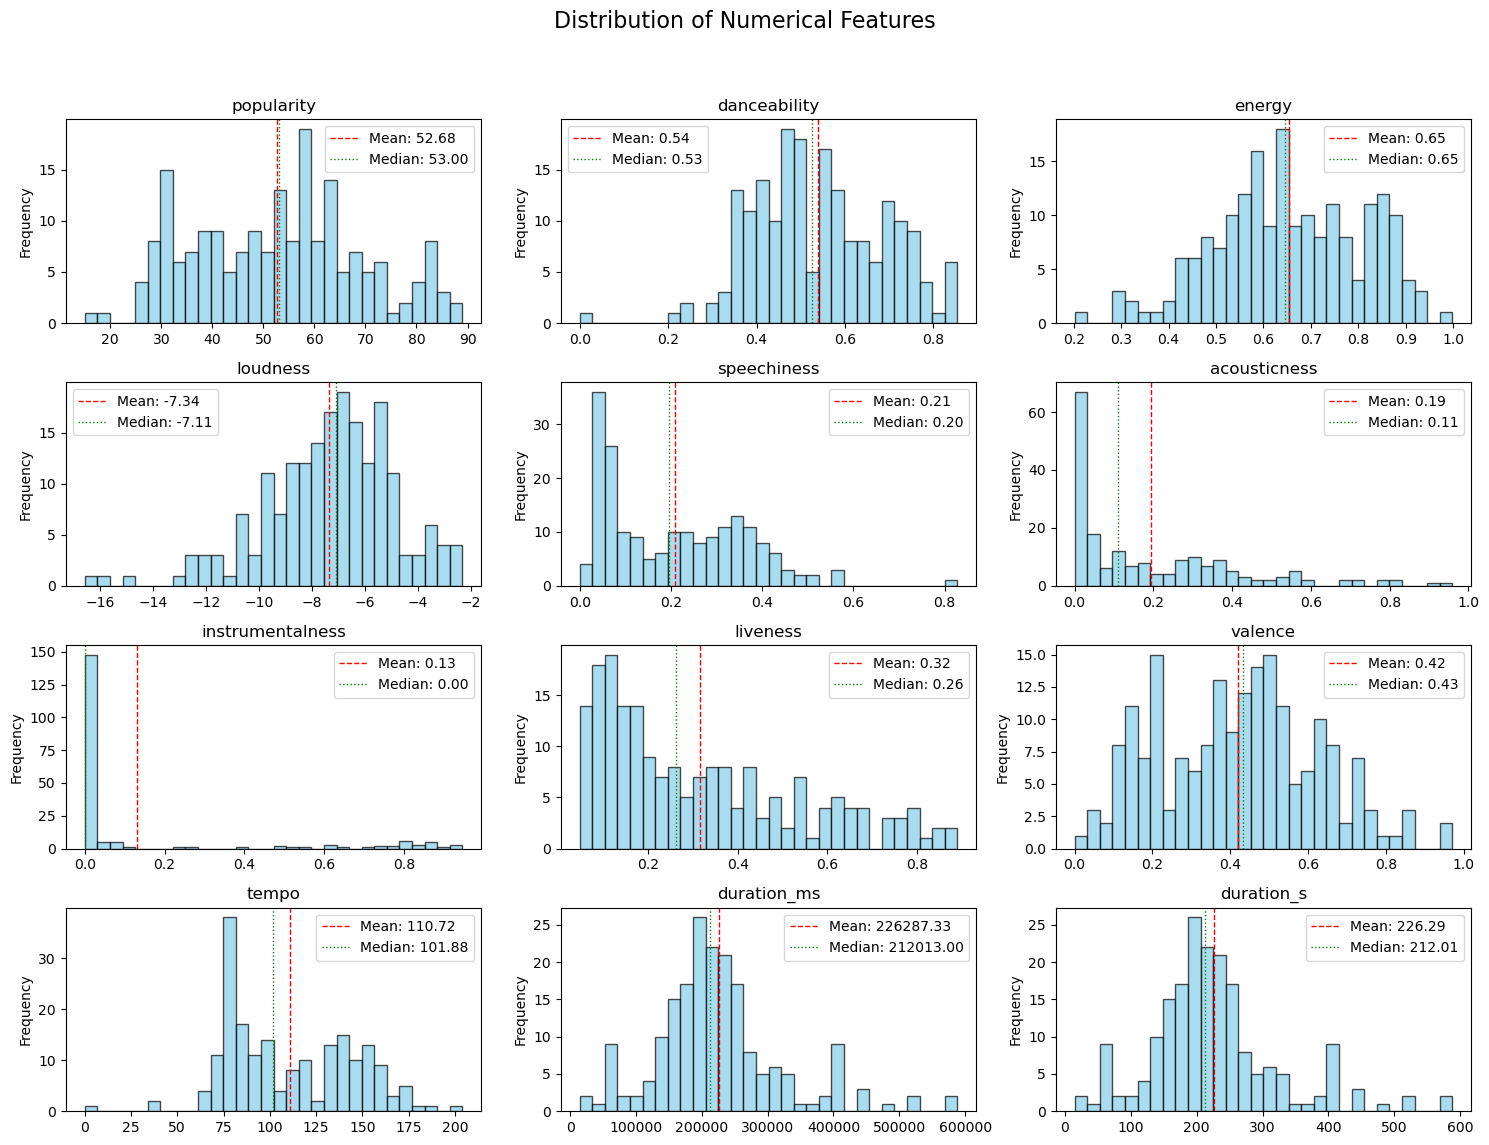

In [68]:
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'duration_s']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize = 16)

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median_val:.2f}')

    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 5.2.2 Categorical features

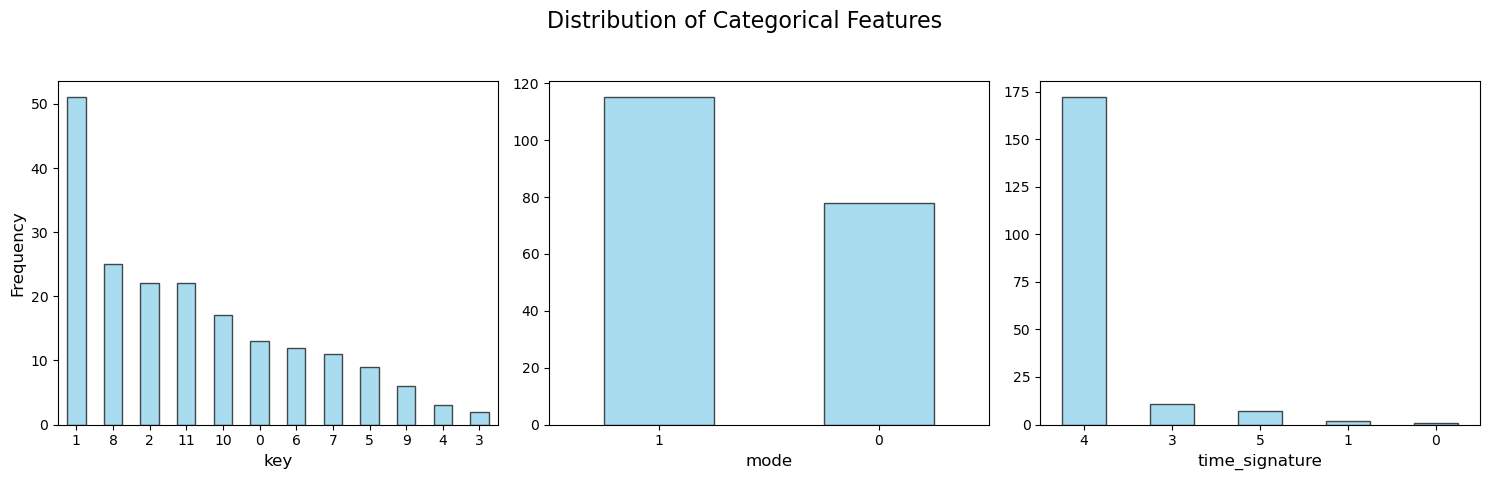

In [70]:
categorical_columns = ['key', 'mode', 'time_signature']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Categorical Features', fontsize = 16)

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)

    axes[i].tick_params(axis='x', rotation=0)
    axes[i].set_xlabel(col, fontsize = 12)
    axes[0].set_ylabel('Frequency', fontsize = 12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 5.3 Album Art and Release Year

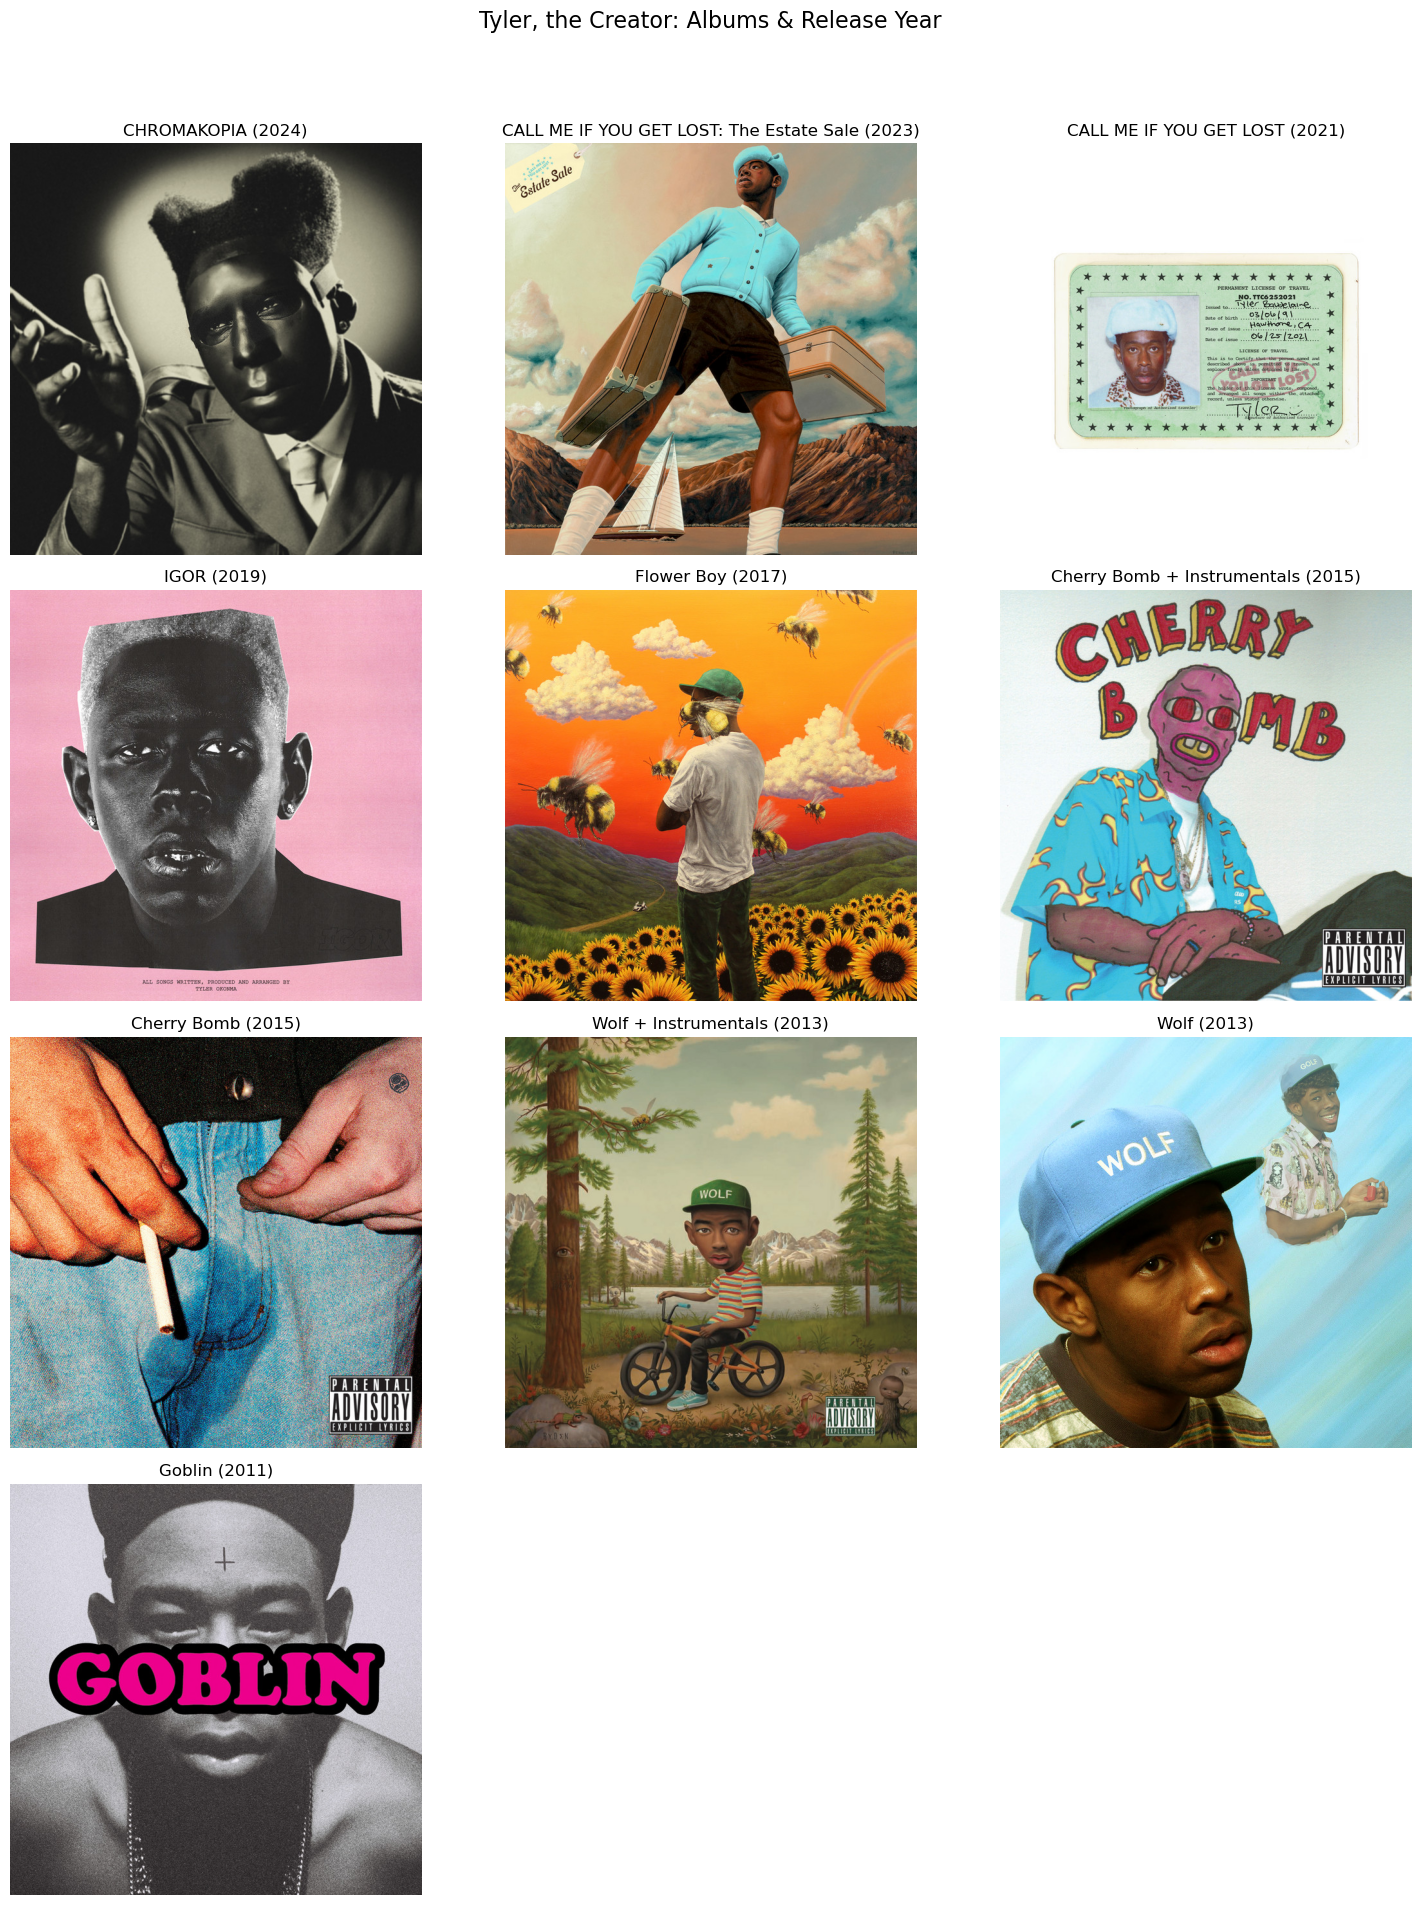

In [72]:
import requests
from PIL import Image
from io import BytesIO

sample_albums = df[['album_name', 'album_artwork_url', 'release_date']].drop_duplicates()

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Tyler, the Creator: Albums & Release Year', fontsize=16)

axes = axes.flatten()

for i, (index, row) in enumerate(sample_albums.iterrows()):
    try:
        response = requests.get(row['album_artwork_url'])
        img = Image.open(BytesIO(response.content))

        axes[i].imshow(img)
        axes[i].axis('off')

        release_year = pd.to_datetime(row['release_date']).year
        axes[i].set_title(f"{row['album_name']} ({release_year})", fontsize=12)
        
    except Exception as e:
        print(f"Error loading image for album: {row['album_name']}. Error: {e}")
        axes[i].axis('off')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 5.4 Correlation Matrix

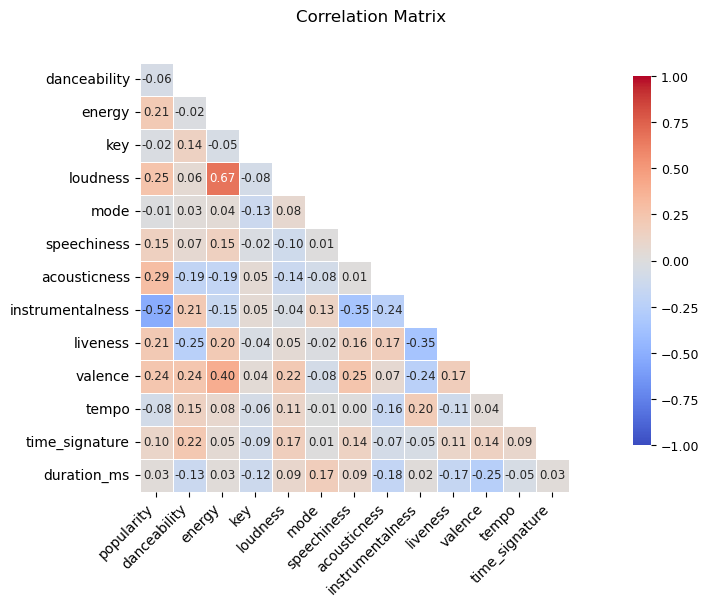

In [74]:
columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']

correlation_matrix = df[columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, linewidths=.5, annot_kws={"size": 8.5}, cmap='coolwarm', square=True, fmt=".2f", vmin=-1, vmax=1, cbar_kws={"shrink": .8})

heatmap.collections[0].colorbar.ax.tick_params(labelsize=9)

filtered_x_labels = columns[:-1] 
filtered_y_labels = columns[1:]

heatmap.set_xticks(heatmap.get_xticks()[:-1])
heatmap.set_yticks(heatmap.get_yticks()[1:])
heatmap.set_xticklabels(filtered_x_labels, rotation=45, ha='right', fontsize=10)
heatmap.set_yticklabels(filtered_y_labels, rotation=0, fontsize=10)

plt.title("Correlation Matrix")
plt.show()

## 5.5 Temporal Analysis

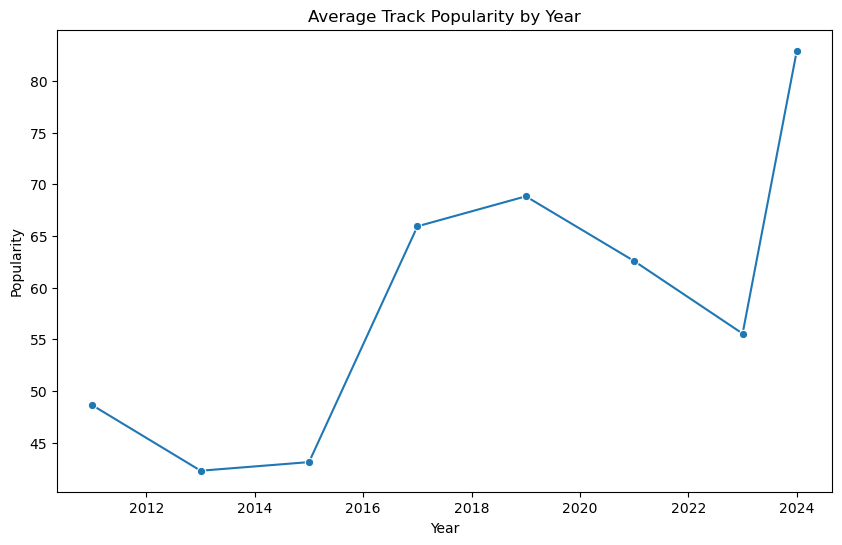

In [76]:
yearly_popularity = df.groupby('year')['popularity'].mean().reset_index()

# Plot the trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_popularity, x='year', y='popularity', marker='o')
plt.title("Average Track Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

## 5.6 Track Feature Analysis

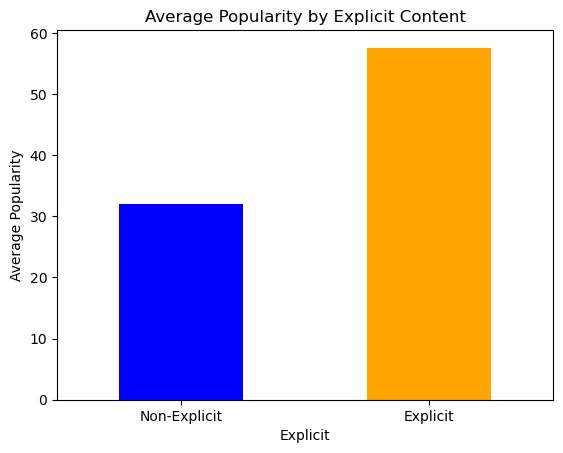

In [78]:
explicit_popularity = df.groupby('explicit')['popularity'].mean()

# Plot the results
explicit_popularity.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Popularity by Explicit Content")
plt.xlabel("Explicit")
plt.ylabel("Average Popularity")
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'], rotation=0)
plt.show()

## 5.7 Audio Features by Album

In [80]:
feature_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'popularity']
album_features = df.groupby('album_name')[feature_cols].mean()

album_features.round(2)

danceability  energy  speechiness  \
album_name                                                                    
CALL ME IF YOU GET LOST                           0.55    0.69         0.26   
CALL ME IF YOU GET LOST: The Estate Sale          0.56    0.71         0.24   
CHROMAKOPIA                                       0.54    0.76         0.22   
Cherry Bomb                                       0.47    0.74         0.14   
Cherry Bomb + Instrumentals                       0.50    0.68         0.11   
Flower Boy                                        0.57    0.56         0.23   
Goblin                                            0.58    0.58         0.34   
IGOR                                              0.47    0.58         0.14   
Wolf                                              0.52    0.66         0.25   
Wolf + Instrumentals                              0.58    0.60         0.18   

                                          acousticness  instrumentalness  \
album_name                                                                 
CALL ME IF YOU GET LOST                           0.26              0.00   
CALL ME IF YOU GET LOST: The Estate Sale          0.31              0.00   
CHROMAKOPIA                                       0.41              0.00   
Cherry Bomb                                       0.06              0.07   
Cherry Bomb + Instrumentals                       0.05              0.31   
Flower Boy                                        0.36              0.06   
Goblin                                            0.13              0.10   
IGOR                                              0.24              0.03   
Wolf                                              0.13              0.00   
Wolf + Instrumentals                              0.13              0.35   

                                          liveness  valence  loudness  \
album_name                                                              
CALL ME IF YOU GET LOST                       0.41     0.55     -6.20   
CALL ME IF YOU GET LOST: The Estate Sale      0.41     0.55     -6.02   
CHROMAKOPIA                                   0.35     0.44     -5.00   
Cherry Bomb                                   0.33     0.34     -5.55   
Cherry Bomb + Instrumentals                   0.26     0.29     -6.05   
Flower Boy                                    0.28     0.38     -9.00   
Goblin                                        0.25     0.38    -10.18   
IGOR                                          0.36     0.34     -8.93   
Wolf                                          0.38     0.49     -7.89   
Wolf + Instrumentals                          0.25     0.42     -8.32   

                                          popularity  
album_name                                            
CALL ME IF YOU GET LOST                        62.56  
CALL ME IF YOU GET LOST: The Estate Sale       55.54  
CHROMAKOPIA                                    82.93  
Cherry Bomb                                    55.46  
Cherry Bomb + Instrumentals                    36.92  
Flower Boy                                     65.93  
Goblin                                         48.61  
IGOR                                           68.83  
Wolf                                           58.83  
Wolf + Instrumentals                           34.42

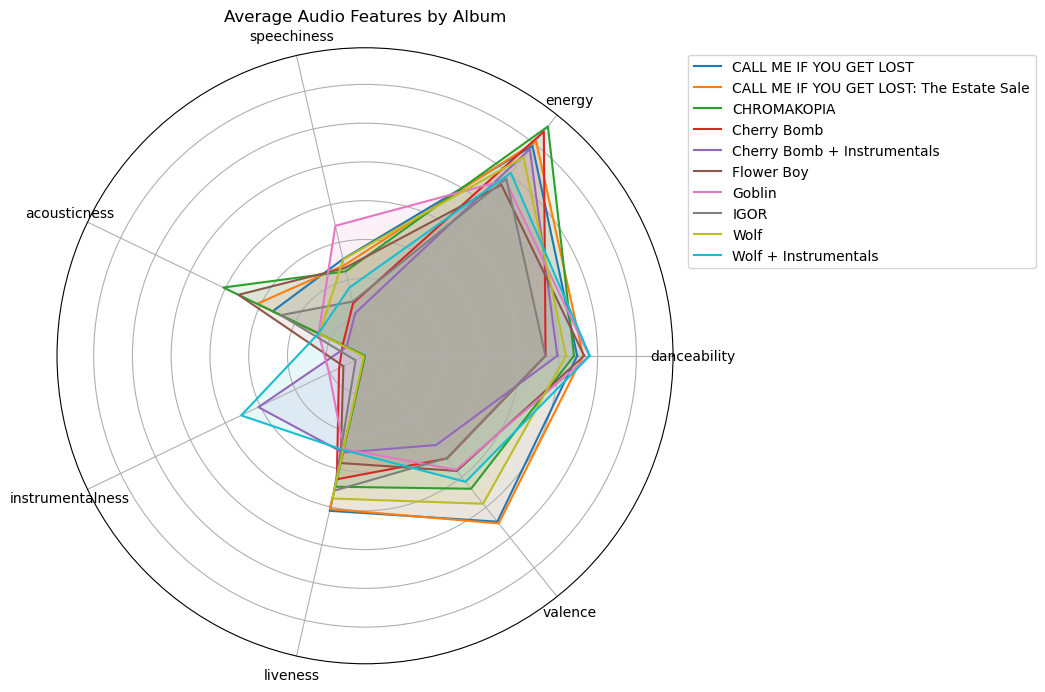

In [81]:
album_features_a = album_features.drop(['loudness', 'popularity'], axis=1)
num_vars = len(feature_cols) - 2
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, (album, row) in enumerate(album_features_a.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=album)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_cols[:-2])
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.title("Average Audio Features by Album")
plt.show()

## 5.8 Featured Artists

In [83]:
import ast

df['featured_artists'] = df['featured_artists'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df['other_features'] = df['featured_artists'].apply(
    lambda x: [artist for artist in x if artist != 'Tyler, The Creator'] if isinstance(x, list) else []
)

df['has_other_features'] = df['other_features'].apply(lambda x: 1 if x else 0)

In [84]:
# 1. Average Popularity Based on the Presence of Other Featured Artists
features_popularity_table = df.groupby('has_other_features')['popularity'].mean().reset_index()
features_popularity_table['has_other_features'] = features_popularity_table['has_other_features'].replace({0: 'No Other Features', 1: 'With Other Features'})
features_popularity_table.columns = ['Other Featured Artists', 'Average Popularity']
print("Average Popularity for Tracks With and Without Other Featured Artists")
display(features_popularity_table)

# 2. Number of Tracks with and without Other Featured Artists
track_counts_table = df['has_other_features'].value_counts().reset_index()
track_counts_table['has_other_features'] = track_counts_table['has_other_features'].replace({0: 'No Other Features', 1: 'With Other Features'})
track_counts_table.columns = ['Other Featured Artists', 'Number of Tracks']
print("\nNumber of Tracks With and Without Other Featured Artists")
display(track_counts_table)

# 3. Top 10 Most Popular Tracks Without Other Features
top_no_features_table = df[df['has_other_features'] == 0].nlargest(10, 'popularity')[['track_name', 'album_name', 'popularity']]
top_no_features_table.columns = ['Track Name', 'Album Name', 'Popularity']
print("\nTop 10 Most Popular Tracks With No Other Featured Artists")
display(top_no_features_table)

# 4. Top 10 Most Popular Tracks with Other Featured Artists
top_with_features_table = df[df['has_other_features'] == 1].nlargest(10, 'popularity')[['track_name', 'album_name', 'popularity']]
top_with_features_table.columns = ['Track Name', 'Album Name', 'Popularity']
print("\nTop 10 Most Popular Tracks With Other Featured Artists")
display(top_with_features_table)

Average Popularity for Tracks With and Without Other Featured Artists


Other Featured Artists  Average Popularity
0      No Other Features           49.563636
1    With Other Features           56.807229


Number of Tracks With and Without Other Featured Artists


Other Featured Artists  Number of Tracks
0      No Other Features               110
1    With Other Features                83


Top 10 Most Popular Tracks With No Other Featured Artists


Track Name   Album Name  Popularity
1                     Rah Tah Tah  CHROMAKOPIA          85
2                            Noid  CHROMAKOPIA          84
4                        Hey Jane  CHROMAKOPIA          83
5                    I Killed You  CHROMAKOPIA          82
6                      Judge Judy  CHROMAKOPIA          82
55                      EARFQUAKE         IGOR          82
9                        Tomorrow  CHROMAKOPIA          81
59                 NEW MAGIC WAND         IGOR          81
65          ARE WE STILL FRIENDS?         IGOR          80
13  I Hope You Find Your Way Home  CHROMAKOPIA          79


Top 10 Most Popular Tracks With Other Featured Artists


Track Name  \
69                    See You Again (feat. Kali Uchis)   
0                     St. Chroma (feat. Daniel Caesar)   
3                   Darling, I (feat. Teezo Touchdown)   
7       Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)   
10   Thought I Was Dead (feat. ScHoolboy Q & Santig...   
8    Take Your Mask Off (feat. Daniel Caesar & LaTo...   
11                         Like Him (feat. Lola Young)   
12                             Balloon (feat. Doechii)   
178                                                She   
41   WUSYANAME (feat. Youngboy Never Broke Again & ...   

                  Album Name  Popularity  
69                Flower Boy          89  
0                CHROMAKOPIA          87  
3                CHROMAKOPIA          85  
7                CHROMAKOPIA          85  
10               CHROMAKOPIA          83  
8                CHROMAKOPIA          82  
11               CHROMAKOPIA          82  
12               CHROMAKOPIA          81  
178                   Goblin          75  
41   CALL ME IF YOU GET LOST          74

# 7. Key Findings and Insights

Based on the exploratory data analysis, several significant insights were uncovered:

- **Explicit Content**: Approximately 80.8% of tracks are marked as explicit, indicating that explicit language is a prominent feature in Tyler, the Creator's discography.

- **Release Day of the Week**: Tyler’s releases are predominantly on Mondays (65.8%). Tyler has expressed that releasing albums on Mondays allows for more active listening during commutes or work hours, compared to passive listening on weekends. He also finds midnight releases, especially in the U.S., disrespectful, proposing a morning release for better engagement. [Tyler's reasoning for Monday releases](https://www.youtube.com/watch?v=JGY71JdCny4&t=1312s).

- **Time Signature Variety**: Most tracks (89.1%) use a standard 4/4 time signature, with some variation across 3/4, 5/4, 1/4, and 0/4.

- **Album Distribution**: The dataset includes a broad selection from Tyler's albums, with "Wolf + Instrumentals" (19.7%) and "Cherry Bomb + Instrumentals" (13.5%) as the most represented.

- **Key and Mode**: The distribution of keys reveals a preference for a few tonal centers, with 26.4% of tracks in Key 1. In terms of modality, 59.6% of tracks are in a major key, while 40.4% are in minor.

- **Popularity and Features**: Tracks with other featured artists average a higher popularity score (56.8) compared to those without (49.6).

- **Top Tracks with Featured Artists**: *"See You Again"* featuring Kali Uchis stands out as the most popular featured track with a score of 89.

- **Notable Solo Tracks**: The top solo track is *"Rah Tah Tah"* from *CHROMAKOPIA* with a popularity score of 85.

This analysis illuminates Tyler, the Creator's stylistic choices and collaboration dynamics.

# 8. Next Steps

1. **Explore Additional Spotify Features**  
   - Deepen the analysis by examining other Spotify features beyond the audio characteristics currently covered. These could include features such as track momentum, analysis segments, and beat measures. Understanding these elements may reveal unique aspects of Tyler’s musical structure and style.

2. **Sentiment and Lyrical Themes Analysis**  
   - Apply natural language processing (NLP) to analyze sentiment and recurring themes in Tyler’s lyrics. Comparing the sentiment and topics across albums, genres, or specific tracks could uncover how lyrical content aligns with audio features like energy, danceability, and valence, offering a holistic view of his creative evolution.

3. **Album Cover Art and Lyrical Themes**  
   - Conduct a color and visual analysis of album cover art, relating it to lyrical themes and sentiment across Tyler's discography. This analysis could reveal whether visual elements on album covers—like color, tone, and imagery—correspond with themes in the lyrics or moods conveyed through the music.

4. **Enhanced Dashboard Visualization**  
   - Create an interactive dashboard that incorporates additional Spotify features and visual representations of album art analysis, sentiment, and lyrical themes. Such a tool would allow users to explore insights dynamically and could be especially appealing in a portfolio to showcase a range of analytical and visualization skills.

---

These next steps broaden the analysis, integrating more complex data types (e.g., visual and textual) to provide a multidimensional view of Tyler, the Creator’s artistry. Expanding this framework to other artists could reveal broader industry trends and stylistic distinctions.